In [1]:
# Dependencies
import numpy as np
import pandas as pd

In [2]:
from sqlalchemy import create_engine
from hold import connection_string

In [3]:
engine = create_engine(f'{connection_string}', encoding='iso-8859-1', connect_args={'connect_timeout': 100})

In [4]:
gtdDF = pd.read_sql_table('global_terrorism', con= engine)

In [5]:
# Need to drop NA's specific to provstate column
gtd_ProvinceDF = gtdDF.dropna(subset=['provstate'])
gtd_ProvinceDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,claimmode_txt,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,None,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0


In [6]:
ProvinceAttacksDF = gtd_ProvinceDF[['index1','provstate']]
ProvinceAttacksDF.head()

,index1,provstate
0,1.0,Kavango
1,2.0,Kavango
2,3.0,Jammu and Kashmir
3,4.0,Kosovo (Province)
4,5.0,Banaadir


In [7]:
gtd_ProvinceDF['attacktype1_txt'].count()

92646

In [8]:
# Group provinces by attack counts
ProvinceGroupDF = ProvinceAttacksDF.groupby(['provstate']).count()
ProvinceGroupDF = ProvinceGroupDF.reset_index()
ProvinceGroupDF = ProvinceGroupDF.rename(columns = {'index1':'Attack Count'})
ProvinceGroupDF = ProvinceGroupDF.sort_values(by='Attack Count', ascending = False)
ProvinceGroupDF.head()

,provstate,Attack Count
158,Baghdad,6983
171,Balochistan,3211
1466,Saladin,2912
854,Khyber Pakhtunkhwa,2900
45,Al Anbar,2662


In [9]:
# Filter provinces by keeping only those with atleast 50 attacks
ProvinceFilterDF = ProvinceGroupDF.loc[(ProvinceGroupDF['Attack Count'] >= 50)]
ProvinceFilterDF.head()

,provstate,Attack Count
158,Baghdad,6983
171,Balochistan,3211
1466,Saladin,2912
854,Khyber Pakhtunkhwa,2900
45,Al Anbar,2662


In [10]:
final_filtered = ProvinceFilterDF['provstate'].tolist()

In [11]:
ProvinceAttacksFilterDF = ProvinceAttacksDF[ProvinceAttacksDF['provstate'].isin(final_filtered)]
ProvinceAttacksFilterDF.head()

,index1,provstate
2,3.0,Jammu and Kashmir
3,4.0,Kosovo (Province)
4,5.0,Banaadir
5,7.0,Assam
6,8.0,Kosovo (Province)


In [12]:
ProvinceAttacks2DF = pd.get_dummies(ProvinceAttacksFilterDF)
ProvinceAttacks2DF.head()

,index1,provstate_Abyan,provstate_Aceh (Province),provstate_Ad Dali,provstate_Adamawa,provstate_Adan,provstate_Agusan del Norte,provstate_Agusan del Sur,provstate_Al Anbar,provstate_Al Bayda,...,provstate_Wasit,provstate_West Bank,provstate_West Bengal,provstate_Western,provstate_Yala,provstate_Yala (Province),provstate_Yobe,provstate_Zabul,provstate_Zamboanga Sibugay,provstate_Zamboanga del Sur
2,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
ProvinceAttacksMergeDF = result = pd.merge(ProvinceAttacks2DF,ProvinceAttacksFilterDF[['index1','provstate']],on='index1')
ProvinceAttacksMergeDF.columns = ProvinceAttacksMergeDF.columns.str.replace('provstate_', '')
ProvinceAttacksMergeDF.head()

,index1,Abyan,Aceh (Province),Ad Dali,Adamawa,Adan,Agusan del Norte,Agusan del Sur,Al Anbar,Al Bayda,...,West Bank,West Bengal,Western,Yala,Yala (Province),Yobe,Zabul,Zamboanga Sibugay,Zamboanga del Sur,provstate
0,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jammu and Kashmir
1,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Kosovo (Province)
2,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Banaadir
3,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Assam
4,8.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Kosovo (Province)


In [14]:
# Assign X (data) and y (target)
X = ProvinceAttacksMergeDF.drop(["index1","provstate"], axis=1)
y = ProvinceAttacksMergeDF["provstate"]
feature_names = X.columns
print(X.shape, y.shape)

(81961, 235) (81961,)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

C:\Users\kruiz\Anaconda3\envs\PythonData\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
from keras.models import Sequential
from keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=235))
model.add(Dense(units=128, activation='relu'))
# Below value should be number of variables
model.add(Dense(units=235, activation='softmax'))

In [17]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=20,
    shuffle=True,
    verbose=2
)

Epoch 1/20
 - 9s - loss: 0.1677 - acc: 0.9798
Epoch 2/20
 - 8s - loss: 9.4105e-05 - acc: 1.0000
Epoch 3/20
 - 9s - loss: 2.2786e-05 - acc: 1.0000
Epoch 4/20
 - 8s - loss: 6.9852e-06 - acc: 1.0000
Epoch 5/20
 - 8s - loss: 2.2528e-06 - acc: 1.0000
Epoch 6/20
 - 8s - loss: 7.1561e-07 - acc: 1.0000
Epoch 7/20
 - 8s - loss: 2.3740e-07 - acc: 1.0000
Epoch 8/20
 - 8s - loss: 1.3166e-07 - acc: 1.0000
Epoch 9/20
 - 8s - loss: 1.1958e-07 - acc: 1.0000
Epoch 10/20
 - 8s - loss: 1.1921e-07 - acc: 1.0000
Epoch 11/20
 - 8s - loss: 1.1921e-07 - acc: 1.0000
Epoch 12/20
 - 8s - loss: 1.1921e-07 - acc: 1.0000
Epoch 13/20
 - 8s - loss: 1.1921e-07 - acc: 1.0000
Epoch 14/20
 - 8s - loss: 1.1921e-07 - acc: 1.0000
Epoch 15/20
 - 8s - loss: 1.1921e-07 - acc: 1.0000
Epoch 16/20
 - 8s - loss: 1.1921e-07 - acc: 1.0000
Epoch 17/20
 - 8s - loss: 1.1921e-07 - acc: 1.0000
Epoch 18/20
 - 8s - loss: 1.1921e-07 - acc: 1.0000
Epoch 19/20
 - 8s - loss: 1.1921e-07 - acc: 1.0000
Epoch 20/20
 - 8s - loss: 1.1921e-07 - acc: 

In [18]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 1.1920928955078125e-07, Accuracy: 1.0


In [19]:
encoded_predictions = model.predict_classes(X_test_scaled[:12])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

C:\Users\kruiz\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:20])}")

Predicted classes: ['Bukidnon' 'Federally Administered Tribal Areas' 'Dhi Qar' 'Ghazni'
 'Al Anbar' 'Zabul' 'North Darfur' 'Lower Shebelle' 'Bakool' 'Saladin'
 'Antioquia' 'Logar']
Actual Labels: ['Bukidnon', 'Federally Administered Tribal Areas', 'Dhi Qar', 'Ghazni', 'Al Anbar', 'Zabul', 'North Darfur', 'Lower Shebelle', 'Bakool', 'Saladin', 'Antioquia', 'Logar', 'Benghazi', 'Saladin', 'Saladin', 'Benghazi', 'Jawzjan', 'Helmand', 'Diyala', 'Kandahar']


In [21]:
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [22]:
sorted(zip(model.feature_importances_, feature_names), reverse=True)

[(0.04978883, 'Khyber Pakhtunkhwa'),
 (0.04568322, 'Al Anbar'),
 (0.044419065, 'Diyala'),
 (0.040994436, 'Nineveh'),
 (0.03751132, 'Federally Administered Tribal Areas'),
 (0.033618625, 'Sindh'),
 (0.030911207, 'Baghdad'),
 (0.02623587, 'Jammu and Kashmir'),
 (0.025192952, 'Kirkuk'),
 (0.019577842, 'Banaadir'),
 (0.019422675, 'Helmand'),
 (0.018373331, 'Balochistan'),
 (0.017792901, 'Kandahar'),
 (0.017773494, 'Babil'),
 (0.017385354, 'North Sinai'),
 (0.016813576, 'Saladin'),
 (0.016298484, 'Pattani'),
 (0.016026769, 'Manipur'),
 (0.014959462, 'Narathiwat'),
 (0.014261093, 'West Bank'),
 (0.014242232, 'Donetsk'),
 (0.013582224, 'Assam'),
 (0.013563371, 'Borno'),
 (0.013469108, 'Chhattisgarh'),
 (0.013186363, 'Northern Ireland'),
 (0.013016748, 'Benghazi'),
 (0.0126776025, 'Jharkhand'),
 (0.012658766, 'Nangarhar'),
 (0.011886782, 'North-West Frontier Province'),
 (0.010486334, 'Southern'),
 (0.010431519, 'Kabul'),
 (0.010157545, 'Yala'),
 (0.009829035, 'Ghazni'),
 (0.009227596, 'Centra

In [23]:
DLAttacksProvinceDF = pd.DataFrame(sorted(zip(model.feature_importances_, feature_names), reverse=True), 
                               columns = ['Probability', 'Province'])
DLAttacksProvinceDF.head()

,Probability,Province
0,0.049789,Khyber Pakhtunkhwa
1,0.045683,Al Anbar
2,0.044419,Diyala
3,0.040994,Nineveh
4,0.037511,Federally Administered Tribal Areas


In [24]:
pies = DLAttacksProvinceDF['Province'].head(10)
pie_slices = DLAttacksProvinceDF['Probability'].head(10)
colors = ["lightskyblue","orange","pink","yellowgreen","lightcoral","silver","yellow",
          "lightgreen","wheat","khaki"]
explode = (0.1,0,0,0,0,0,0,0,0,0)

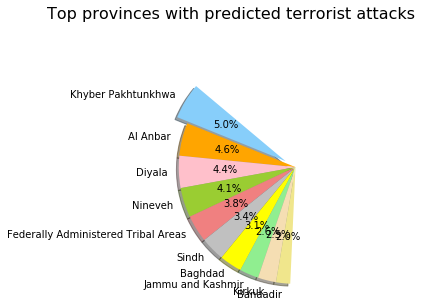

In [25]:
# Tell matplotlib to create a pie chart based upon the above data
pyplot.pie(pie_slices, explode=explode, labels=pies, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
pyplot.axis("equal")
# Save an image of our chart and print the final product to the screen

pyplot.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML21_Province_Attacks_Pie_DL")
pyplot.suptitle('Top provinces with predicted terrorist attacks', size=16, y=1.12) 
pyplot.show()

In [26]:
DLTop15ProvinceDF = DLAttacksProvinceDF.head(15)
DLTop15ProvinceDF

,Probability,Province
0,0.049789,Khyber Pakhtunkhwa
1,0.045683,Al Anbar
2,0.044419,Diyala
3,0.040994,Nineveh
4,0.037511,Federally Administered Tribal Areas
5,0.033619,Sindh
6,0.030911,Baghdad
7,0.026236,Jammu and Kashmir
8,0.025193,Kirkuk
9,0.019578,Banaadir


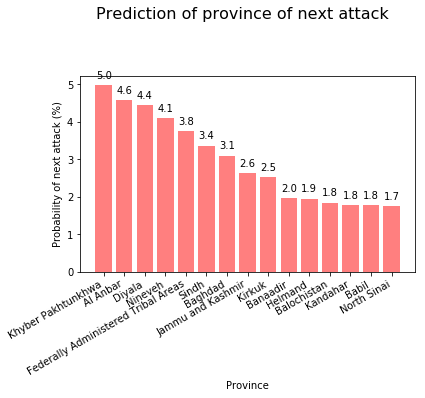

In [27]:
y_axis = DLTop15ProvinceDF['Probability']*100
x_axis = DLTop15ProvinceDF['Province']
fig, ax = pyplot.subplots()
# plot
ax.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

# Labels for x and y axes
pyplot.xlabel("Province")
pyplot.ylabel("Probability of next attack (%)")

# Show the values of each probability on plot
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above. All the magic happens there.
add_value_labels(ax)

# Save an image of our chart and print the final product to the screen
pyplot.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML21_Province_Attacks_Bar_DL")
# Title for the chart
pyplot.suptitle('Prediction of province of next attack', size=16, y=1.12) 
pyplot.show()
